# <center> Credit Card Fraud Detection </center>

In [2]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams

In [3]:
df = pd.read_csv("C:/Users/DELL/Downloads/archive (6)/fraudTrain.csv")

## Data Analysis and Visualization

In [4]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [5]:
df.shape

(1296675, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [7]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [8]:
df.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0
1296674,1296674,2020-06-21 12:13:37,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,Jeffrey,Smith,M,135 Joseph Mountains,...,45.8433,-113.8748,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,1371816817,46.565983,-114.186110,0


In [9]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [10]:
df['is_fraud'].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [11]:
df.isnull().values.any()

False

In [12]:
df['street'].value_counts()

0069 Robin Brooks Apt. 695           3123
864 Reynolds Plains                  3123
8172 Robertson Parkways Suite 072    3119
4664 Sanchez Common Suite 930        3117
8030 Beck Motorway                   3113
                                     ... 
7281 Joshua Mills Apt. 077              7
3307 Ferguson Way                       7
9599 Washington Field Suite 238         7
3437 Ross Flat Apt. 592                 7
27954 Hall Mill Suite 575               7
Name: street, Length: 983, dtype: int64

In [13]:
df.duplicated().sum()

0

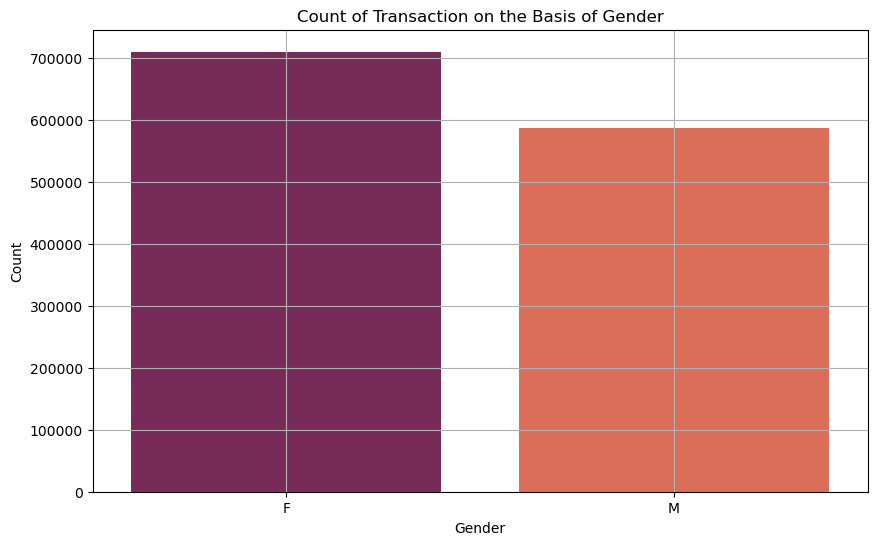

In [14]:
plt.figure(figsize = (10, 6))
sns.countplot(x = 'gender', data = df, palette = 'rocket')
plt.xticks(rotation = 'horizontal')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Transaction on the Basis of Gender')
plt.grid()
plt.show()

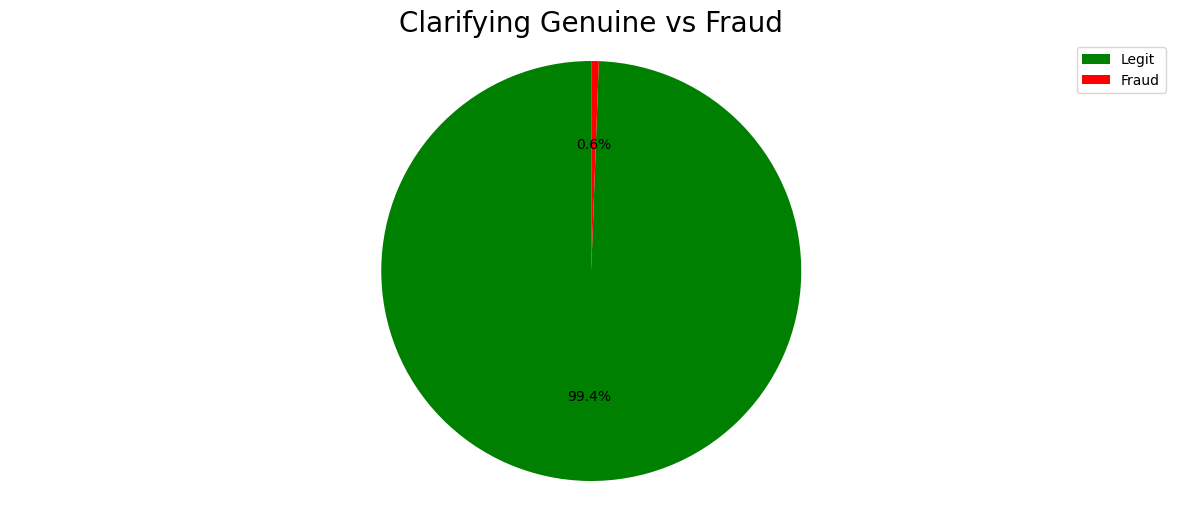

In [15]:
Fraud_Detc = df.is_fraud.value_counts()
labels = ['Legit', 'Fraud']
sizes = Fraud_Detc.values
color = ['green','red']
plt.figure(figsize = (15, 6))
plt.pie(sizes, colors = color, autopct = '%1.1f%%', startangle = 90)
plt.axis('equal')
plt.title('Clarifying Genuine vs Fraud', fontsize = 20)
plt.legend(labels)
plt.show()

## Data Preprocessing

In [16]:
df.drop(['Unnamed: 0', 'trans_date_trans_time', 'merchant', 'first', 'last', 'street', 'city', 'job', 'dob', 'unix_time'], axis = 1, inplace = True)

In [17]:
df.head()

,cc_num,category,amt,gender,state,zip,lat,long,city_pop,trans_num,merch_lat,merch_long,is_fraud
0,2703186189652095,misc_net,4.97,F,NC,28654,36.0788,-81.1781,3495,0b242abb623afc578575680df30655b9,36.011293,-82.048315,0
1,630423337322,grocery_pos,107.23,F,WA,99160,48.8878,-118.2105,149,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
2,38859492057661,entertainment,220.11,M,ID,83252,42.1808,-112.2620,4154,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
3,3534093764340240,gas_transport,45.00,M,MT,59632,46.2306,-112.1138,1939,6b849c168bdad6f867558c3793159a81,47.034331,-112.561071,0
4,375534208663984,misc_pos,41.96,M,VA,24433,38.4207,-79.4629,99,a41d7549acf90789359a9aa5346dcb46,38.674999,-78.632459,0


In [18]:
gender = {'F' : 0,'M' : 1}
df['gender'] = df['gender'].map(gender)

In [19]:
df.head()

,cc_num,category,amt,gender,state,zip,lat,long,city_pop,trans_num,merch_lat,merch_long,is_fraud
0,2703186189652095,misc_net,4.97,0,NC,28654,36.0788,-81.1781,3495,0b242abb623afc578575680df30655b9,36.011293,-82.048315,0
1,630423337322,grocery_pos,107.23,0,WA,99160,48.8878,-118.2105,149,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
2,38859492057661,entertainment,220.11,1,ID,83252,42.1808,-112.2620,4154,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
3,3534093764340240,gas_transport,45.00,1,MT,59632,46.2306,-112.1138,1939,6b849c168bdad6f867558c3793159a81,47.034331,-112.561071,0
4,375534208663984,misc_pos,41.96,1,VA,24433,38.4207,-79.4629,99,a41d7549acf90789359a9aa5346dcb46,38.674999,-78.632459,0


In [20]:
len(df['state'].value_counts())

51

In [21]:
df.dtypes.value_counts()

int64      5
float64    5
object     3
dtype: int64

In [22]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [23]:
print(X[:5])

[[2703186189652095 'misc_net' 4.97 0 'NC' 28654 36.0788 -81.1781 3495
  '0b242abb623afc578575680df30655b9' 36.011293 -82.048315]
 [630423337322 'grocery_pos' 107.23 0 'WA' 99160 48.8878 -118.2105 149
  '1f76529f8574734946361c461b024d99' 49.159047 -118.186462]
 [38859492057661 'entertainment' 220.11 1 'ID' 83252 42.1808 -112.262
  4154 'a1a22d70485983eac12b5b88dad1cf95' 43.150704 -112.154481]
 [3534093764340240 'gas_transport' 45.0 1 'MT' 59632 46.2306 -112.1138
  1939 '6b849c168bdad6f867558c3793159a81' 47.034331 -112.561071]
 [375534208663984 'misc_pos' 41.96 1 'VA' 24433 38.4207 -79.4629 99
  'a41d7549acf90789359a9aa5346dcb46' 38.674999 -78.632459]]


In [25]:
print(y[:5])

[0 0 0 0 0]


In [26]:
from sklearn.preprocessing import LabelEncoder
encode_1 = LabelEncoder()
encode_2 = LabelEncoder()
encode_3 = LabelEncoder()
X[:, 1] = encode_1.fit_transform(X[:, 1])
X[:, 4] = encode_2.fit_transform(X[:, 4])
X[:, 9] = encode_3.fit_transform(X[:, 9])

In [27]:
print(X[:, 1][:20])

[8 4 0 2 9 2 3 2 9 4 4 11 4 4 12 11 8 12 1 4]


In [28]:
print(X[:, 4][:20])

[27 47 13 26 45 38 16 45 38 42 12 49 9 4 32 31 36 15 38 31]


In [29]:
print(X[:, 9][:20])

[56438 159395 818703 544575 831111 124696 667812 552855 1277329 301740
 1089826 306219 981946 330177 700762 945968 775490 1221760 673264 50301]


In [30]:
print(X[:10])

[[2703186189652095 8 4.97 0 27 28654 36.0788 -81.1781 3495 56438
  36.011293 -82.048315]
 [630423337322 4 107.23 0 47 99160 48.8878 -118.2105 149 159395 49.159047
  -118.186462]
 [38859492057661 0 220.11 1 13 83252 42.1808 -112.262 4154 818703
  43.150704 -112.154481]
 [3534093764340240 2 45.0 1 26 59632 46.2306 -112.1138 1939 544575
  47.034331 -112.561071]
 [375534208663984 9 41.96 1 45 24433 38.4207 -79.4629 99 831111 38.674999
  -78.632459]
 [4767265376804500 2 94.63 0 38 18917 40.375 -75.2045 2158 124696
  40.653382 -76.15266700000001]
 [30074693890476 3 44.54 0 16 67851 37.9931 -100.9893 2691 667812
  37.162705 -100.15337]
 [6011360759745864 2 71.65 1 45 22824 38.8432 -78.6003 6018 552855
  38.948089 -78.540296]
 [4922710831011201 9 4.27 0 38 15665 40.3359 -79.6607 1472 1277329
  40.351813 -79.958146]
 [2720830304681674 4 198.39 0 42 37040 36.522 -87.34899999999999 151785
  301740 37.179198 -87.485381]]


## Splitting the dataset

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [32]:
len(X_train)

1037340

In [33]:
len(y_train)

1037340

In [34]:
len(X_test)

259335

In [35]:
len(y_test)

259335

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
print(X_train[:10])

[[-0.31864488  1.73007093 -0.40300154 -0.90848332 -0.60678864  0.81570055
  -1.55255482 -0.10208397 -0.29072061  1.56639896 -1.4380815  -0.08744271]
 [-0.31593235 -1.59218521 -0.3167202  -0.90848332  1.41748899  1.83874567
   1.93108458 -2.335859   -0.29434207  1.14178325  1.72920458 -2.36236846]
 [ 2.80668465 -0.31439439 -0.21767984 -0.90848332  1.13827828  0.99906464
  -1.21251266 -0.33760358 -0.21332794  1.69952033 -1.28135485 -0.37403537]
 [-0.3183857  -0.82551072 -0.17750786  1.10073568 -0.32757793  0.03050803
   1.24558243  0.32058461 -0.28436565  0.39099238  1.33856741  0.27405687]
 [-0.3185108   0.19672194 -0.08257312 -0.90848332 -0.88599935  0.43260724
   0.5909717   0.15745371  0.13065494  1.38463461  0.75057162  0.22594996]
 [-0.31364189 -0.56995255  0.077799    1.10073568 -1.23501273 -0.55119871
  -2.28537919  0.58054404 -0.03284445 -0.95848653 -2.15423141  0.53524748]
 [ 3.43153182 -0.82551072 -0.24686137  1.10073568 -1.23501273 -0.58619782
  -2.73499925  0.64281796 -0.185

In [38]:
print(X_test[:10])

[[-0.31864798  0.70783827  0.7844722   1.10073568  0.7892649  -1.23165426
   0.40922842  0.78300699 -0.29140315  1.7323971   0.3684825   0.82516323]
 [-0.31862521 -0.31439439 -0.11364956 -0.90848332  0.71946222  1.81040421
   0.84456514 -2.48822067 -0.29390472  1.09226631  0.82610165 -2.42755471]
 [-0.3150879   1.47451276 -0.40287521 -0.90848332  0.7892649  -1.24046913
   0.28083591  0.75895256 -0.29401405  0.10653792  0.37918829  0.82275279]
 [-0.31596196 -0.05883622 -0.39782213  1.10073568  0.51005419 -1.2785553
   0.8707677   0.93906991 -0.25911479  0.38222863  1.0234906   0.99390637]
 [-0.31405387 -1.08106888 -0.03804285 -0.90848332  1.62689702  1.24301697
   0.61155942 -1.01619586 -0.29251974 -1.38714869  0.48980268 -1.00764673]
 [ 3.39244468  1.47451276  0.37574121  1.10073568  1.34768631 -1.60477971
   1.10666949  1.28982244 -0.29140978 -1.27225239  1.12229526  1.26988714]
 [-0.31862517 -0.56995255  0.25762547  1.10073568 -0.32757793 -0.02226958
   0.75630391  0.51940449  1.9363

## Model Training

In [39]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree_clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = 20, max_leaf_nodes = 10)
print('Model Has Been Trained Successfuly.\n', tree_clf.fit(X_train, y_train))

Model Has Been Trained Successfuly.
 DecisionTreeClassifier(criterion='entropy', max_depth=20, max_leaf_nodes=10,
                       random_state=0)


In [40]:
print('The Model Prediction of first Label:', tree_clf.predict(scaler.transform([[2703186189652095, 8, 4.97, 0, 27, 28654, 36.0788, -81.1781, 3495, 56438, 36.011293, -82.048315]])))

The Model Prediction of first Label: [0]


In [41]:
y_pred = tree_clf.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1)[:40])

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix on the Predicted Test Result is\n', cm)
print()
print('Model Accuracy Score is\n', accuracy_score(y_test, y_pred))

Confusion Matrix on the Predicted Test Result is
 [[257805     10]
 [  1171    349]]

Model Accuracy Score is
 0.9954460446912294


In [46]:
report = classification_report(y_test, y_pred)
print('The Classification Reports of the Model Performed is \n ', report)

The Classification Reports of the Model Performed is 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.97      0.23      0.37      1520

    accuracy                           1.00    259335
   macro avg       0.98      0.61      0.68    259335
weighted avg       1.00      1.00      0.99    259335



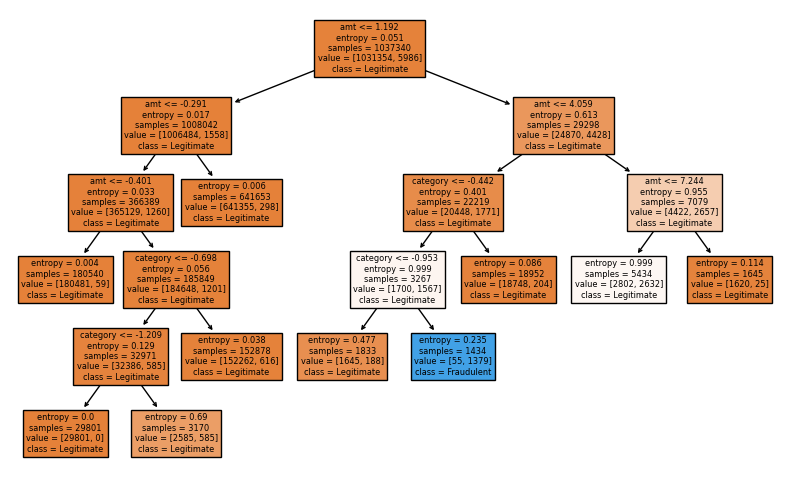

In [47]:
plt.figure(figsize=(10, 6))
plot_tree(tree_clf, filled = True, feature_names = df.columns, class_names = ['Legitimate', 'Fraudulent'])
plt.show()